<a href="https://colab.research.google.com/github/senakrgli/GooglePlayStoreAnalytics/blob/main/Google_Play_Store_App_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

In this notebook, we will do a comprehensive analysis of the Android app market by comparing thousands of apps in the Google Play store.

Bu not defterimizde Google Play mağazasındaki binlerce uygulamayı karşılaştırarak Android uygulama pazarının kapsamlı bir analizini yapacağız.

# About the Dataset of Google Play Store Apps & Reviews

**Data Source:** <br>
App and review data was scraped from the Google Play Store by Lavanya Gupta in 2018. Original files listed [here](
https://www.kaggle.com/lava18/google-play-store-apps).

# Import Statements

In [ ]:
import pandas as pd
import plotly.express as px

# Notebook Presentation

In [ ]:
# Show numeric output in decimal format e.g., 2.15
pd.options.display.float_format = '{:,.2f}'.format

# Read the Dataset

In [ ]:
df_apps = pd.read_csv('apps.csv')

# Data Cleaning

**Challenge**: How many rows and columns does `df_apps` have? What are the column names? Look at a random sample of 5 different rows with [.sample()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html).

In [ ]:
df_apps.shape

(10841, 12)

In [ ]:
df_apps.sample(5)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Android_Ver
2416,BJ Bridge Standard American 2018,GAME,1.00,1,4.90,"1,000",Free,0,Everyone,Card,"May 21, 2018",4.0 and up
4621,"EG SIM CARD (EGSIMCARD, 이지심카드)",BUSINESS,2.90,322,1.50,"50,000",Free,0,Everyone,Business,"March 28, 2017",2.2 and up
182,E2CR CL,LIFESTYLE,NaN,0,25.00,10,Free,0,Everyone,Lifestyle,"June 30, 2017",4.1 and up
2379,EG CrossPad - ASPECT4,BUSINESS,NaN,4,30.00,"1,000",Free,0,Everyone,Business,"July 3, 2018",4.1 and up
7244,The Fish Master!,GAME,4.10,15763,54.00,"1,000,000",Free,0,Everyone,Arcade,"July 17, 2018",4.1 and up


In [ ]:
df_apps.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_MBs', 'Installs', 'Type',
       'Price', 'Content_Rating', 'Genres', 'Last_Updated', 'Android_Ver'],
      dtype='object')

### Drop Unused Columns

Remove the columns called `Last_Updated` and `Android_Version` from the DataFrame.

In [ ]:
df_apps.drop(['Last_Updated', 'Android_Ver'], axis=1, inplace=True)
df_apps.head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
0,Ak Parti Yardım Toplama,SOCIAL,NaN,0,8.70,0,Paid,$13.99,Teen,Social
1,Ain Arabic Kids Alif Ba ta,FAMILY,NaN,0,33.00,0,Paid,$2.99,Everyone,Education
2,Popsicle Launcher for Android P 9.0 launcher,PERSONALIZATION,NaN,0,5.50,0,Paid,$1.49,Everyone,Personalization
3,Command & Conquer: Rivals,FAMILY,NaN,0,19.00,0,NaN,0,Everyone 10+,Strategy
4,CX Network,BUSINESS,NaN,0,10.00,0,Free,0,Everyone,Business


<Axes: xlabel='Category'>

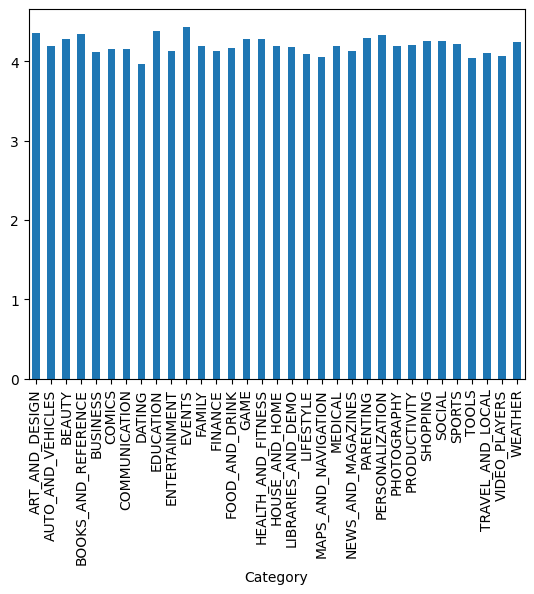

In [ ]:
# @title Average Rating by Category

df_apps.groupby('Category')['Rating'].mean().plot(kind='bar')

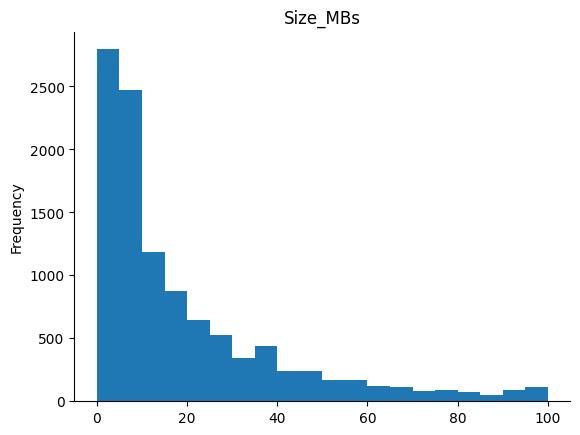

In [ ]:
# @title Size_MBs

from matplotlib import pyplot as plt
df_apps['Size_MBs'].plot(kind='hist', bins=20, title='Size_MBs')
plt.gca().spines[['top', 'right',]].set_visible(False)

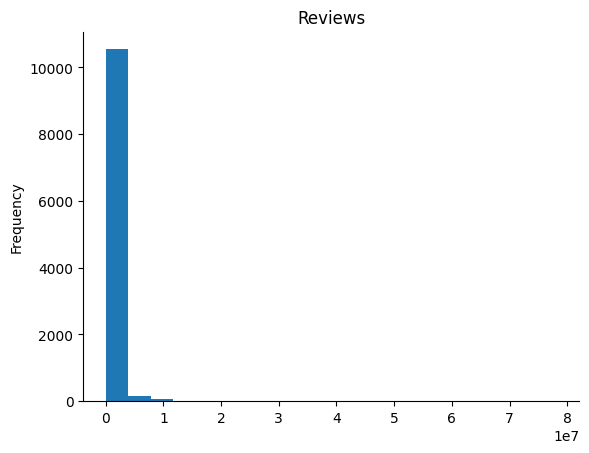

In [ ]:
# @title Reviews

from matplotlib import pyplot as plt
df_apps['Reviews'].plot(kind='hist', bins=20, title='Reviews')
plt.gca().spines[['top', 'right',]].set_visible(False)

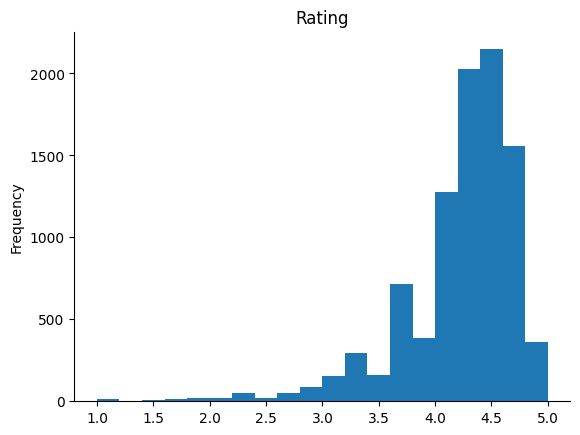

In [ ]:
# @title Rating

from matplotlib import pyplot as plt
df_apps['Rating'].plot(kind='hist', bins=20, title='Rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

### Find and Remove NaN values in Ratings

How may rows have a NaN value (not-a-number) in the Ratings column? Create DataFrame called `df_apps_clean` that does not include these rows.

In [ ]:
df_apps.isna().any().sum()

2

In [ ]:
cle_df_apps=df_apps.dropna()
cle_df_apps.shape

(9367, 10)

### Find and Remove Duplicates

Are there any duplicates in data? Check for duplicates using the [.duplicated()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html) function. How many entries can you find for the "Instagram" app? Use [.drop_duplicates()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html) to remove any duplicates from `df_apps_clean`.


In [ ]:
duplicated_rows = cle_df_apps[cle_df_apps.duplicated()]
print(duplicated_rows.shape)
duplicated_rows.head()

(476, 10)


,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
946,420 BZ Budeze Delivery,MEDICAL,5.00,2,11.00,100,Free,0,Mature 17+,Medical
1133,MouseMingle,DATING,2.70,3,3.90,100,Free,0,Mature 17+,Dating
1196,"Cardiac diagnosis (heart rate, arrhythmia)",MEDICAL,4.40,8,6.50,100,Paid,$12.99,Everyone,Medical
1231,Sway Medical,MEDICAL,5.00,3,22.00,100,Free,0,Everyone,Medical
1247,Chat Kids - Chat Room For Kids,DATING,4.70,6,4.90,100,Free,0,Mature 17+,Dating


In [ ]:
cle_df_apps[cle_df_apps.App=="Instagram"]

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10806,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10808,Instagram,SOCIAL,4.50,66577446,5.30,"1,000,000,000",Free,0,Teen,Social
10809,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10810,Instagram,SOCIAL,4.50,66509917,5.30,"1,000,000,000",Free,0,Teen,Social


In [ ]:
cle_df_apps=cle_df_apps.drop_duplicates()
cle_df_apps[cle_df_apps.App=="Instagram"]

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10806,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10808,Instagram,SOCIAL,4.50,66577446,5.30,"1,000,000,000",Free,0,Teen,Social
10810,Instagram,SOCIAL,4.50,66509917,5.30,"1,000,000,000",Free,0,Teen,Social


In [ ]:
cle_df_apps=cle_df_apps.drop_duplicates(subset = ["App", "Type", "Price"])
cle_df_apps[cle_df_apps.App=="Instagram"]

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10806,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social


In [ ]:
cle_df_apps.shape


(8199, 10)

# Find Highest Rated Apps

Identify which apps are the highest rated.

In [ ]:
cle_df_apps.sort_values('Rating', ascending=False).head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
21,KBA-EZ Health Guide,MEDICAL,5.00,4,25.00,1,Free,0,Everyone,Medical
1230,Sway Medical,MEDICAL,5.00,3,22.00,100,Free,0,Everyone,Medical
1227,AJ Men's Grooming,LIFESTYLE,5.00,2,22.00,100,Free,0,Everyone,Lifestyle
1224,FK Dedinje BGD,SPORTS,5.00,36,2.60,100,Free,0,Everyone,Sports
1223,CB VIDEO VISION,PHOTOGRAPHY,5.00,13,2.60,100,Free,0,Everyone,Photography


Analysis: Apps with very few reviews and low download counts often have perfect 5-star ratings, most likely due to being rated by friends and family.

# Find 5 Largest Apps in terms of Size (MBs)

What's the size in megabytes (MB) of the largest Android apps in the Google Play Store. Based on the data, do you think there could be limit in place or can developers make apps as large as they please?

In [ ]:
cle_df_apps.sort_values('Size_MBs', ascending=False)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
9942,Talking Babsy Baby: Baby Games,LIFESTYLE,4.00,140995,100.00,"10,000,000",Free,0,Everyone,Lifestyle;Pretend Play
10687,Hungry Shark Evolution,GAME,4.50,6074334,100.00,"100,000,000",Free,0,Teen,Arcade
9943,Miami crime simulator,GAME,4.00,254518,100.00,"10,000,000",Free,0,Mature 17+,Action
9944,Gangster Town: Vice District,FAMILY,4.30,65146,100.00,"10,000,000",Free,0,Mature 17+,Simulation
3144,Vi Trainer,HEALTH_AND_FITNESS,3.60,124,100.00,"5,000",Free,0,Everyone,Health & Fitness
...,...,...,...,...,...,...,...,...,...,...
2648,Ad Remove Plugin for App2SD,PRODUCTIVITY,4.10,66,0.02,"1,000",Paid,$1.29,Everyone,Productivity
5798,ExDialer PRO Key,COMMUNICATION,4.50,5474,0.02,"100,000",Paid,$3.99,Everyone,Communication
2684,My baby firework (Remove ad),FAMILY,4.10,30,0.01,"1,000",Paid,$0.99,Everyone,Entertainment
7966,Market Update Helper,LIBRARIES_AND_DEMO,4.10,20145,0.01,"1,000,000",Free,0,Everyone,Libraries & Demo


Analysis: Here, we can clearly see a 100 MB upper limit for the size of an application. A Google search will reveal that this limit is enforced by the Google Play Store itself. We see that some applications reach this limit exactly.






# Find the 5 App with Most Reviews

Which apps have the highest number of reviews? Are there any paid apps among the top 50?


In [ ]:
cle_df_apps.sort_values('Reviews', ascending=False).head(50)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10805,Facebook,SOCIAL,4.10,78158306,5.30,"1,000,000,000",Free,0,Teen,Social
10785,WhatsApp Messenger,COMMUNICATION,4.40,69119316,3.50,"1,000,000,000",Free,0,Everyone,Communication
10806,Instagram,SOCIAL,4.50,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10784,Messenger – Text and Video Chat for Free,COMMUNICATION,4.00,56642847,3.50,"1,000,000,000",Free,0,Everyone,Communication
10650,Clash of Clans,GAME,4.60,44891723,98.00,"100,000,000",Free,0,Everyone 10+,Strategy
10744,Clean Master- Space Cleaner & Antivirus,TOOLS,4.70,42916526,3.40,"500,000,000",Free,0,Everyone,Tools
10835,Subway Surfers,GAME,4.50,27722264,76.00,"1,000,000,000",Free,0,Everyone 10+,Arcade
10828,YouTube,VIDEO_PLAYERS,4.30,25655305,4.65,"1,000,000,000",Free,0,Teen,Video Players & Editors
10746,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.70,24900999,3.40,"500,000,000",Free,0,Everyone,Tools
10584,Clash Royale,GAME,4.60,23133508,97.00,"100,000,000",Free,0,Everyone 10+,Strategy


Analysis: If you look at the number of reviews, you can find the most popular apps on the Android App Store. These include Facebook, WhatsApp, Instagram, etc. Additionally, there is not a single paid app in the top 50 most reviewed apps list.

# Plotly Pie and Donut Charts - Visualise Categorical Data: Content Ratings

In [ ]:
ratings = cle_df_apps.Content_Rating.value_counts()
print(ratings)

Everyone           6621
Teen                912
Mature 17+          357
Everyone 10+        305
Adults only 18+       3
Unrated               1
Name: Content_Rating, dtype: int64


In [ ]:
fig = px.pie(labels=ratings.index,
values=ratings.values,
title="Content Rating",
names=ratings.index,
)
fig.update_traces(textposition='outside', textinfo='percent+label')

fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:137: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  return args["labels"][column]


In [ ]:
fig = px.pie(labels=ratings.index,
values=ratings.values,
title="Content Rating",
names=ratings.index,
hole=0.4,
)
fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')

fig.show()

/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:137: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



# Numeric Type Conversion: Examine the Number of Installs

**Challenge**: How many apps had over 1 billion (that's right - BILLION) installations? How many apps just had a single install?

Check the datatype of the Installs column.

Count the number of apps at each level of installations.

Convert the number of installations (the Installs column) to a numeric data type. Hint: this is a 2-step process. You'll have make sure you remove non-numeric characters first.

Kaç uygulamanın 1 milyarın üzerinde (bu doğru - MİLYAR) kurulumu oldu? Tek bir yüklemede kaç uygulama gerçekleştirildi?

Yüklemeler sütununun veri türünü kontrol edin

Her kurulum seviyesindeki uygulamaların sayısını sayın.

Kurulum sayısını (Yüklemeler sütunu) sayısal bir veri türüne dönüştürün. İpucu: Bu 2 adımlı bir işlemdir. Öncelikle sayısal olmayan karakterleri kaldırdığınızdan emin olmalısınız.

In [ ]:
cle_df_apps.Installs.describe()

count          8199
unique           19
top       1,000,000
freq           1417
Name: Installs, dtype: object

In [ ]:
cle_df_apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8199 entries, 21 to 10835
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8199 non-null   object 
 1   Category        8199 non-null   object 
 2   Rating          8199 non-null   float64
 3   Reviews         8199 non-null   int64  
 4   Size_MBs        8199 non-null   float64
 5   Installs        8199 non-null   object 
 6   Type            8199 non-null   object 
 7   Price           8199 non-null   object 
 8   Content_Rating  8199 non-null   object 
 9   Genres          8199 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 704.6+ KB


In [ ]:
cle_df_apps[["Installs", "App"]].groupby("Installs").count()

,App
Installs,
1,3
"1,000",698
"1,000,000",1417
"1,000,000,000",20
10,69
"10,000",988
"10,000,000",933
100,303
"100,000",1096


In [ ]:
cle_df_apps.Installs = cle_df_apps.Installs.astype(str).str.replace(',', "")
cle_df_apps.Installs = pd.to_numeric(cle_df_apps.Installs)
cle_df_apps[['App', 'Installs']].groupby('Installs').count()

,App
Installs,
1,3
5,9
10,69
50,56
100,303
500,199
1000,698
5000,425
10000,988


# Find the Most Expensive Apps, Filter out the Junk, and Calculate a (ballpark) Sales Revenue Estimate

Let's examine the Price column more closely.

**Challenge**: Convert the price column to numeric data. Then investigate the top 20 most expensive apps in the dataset.

Fiyat sütununu sayısal verilere dönüştürün.
Ardından veri kümesindeki en pahalı 20 uygulamayı araştırın.

Remove all apps that cost more than $250 from the `df_apps_clean` DataFrame.

Maliyeti 250 dolardan fazla olan tüm uygulamaları df_apps_clean DataFrame'den kaldırın

Add a column called 'Revenue_Estimate' to the DataFrame. This column should hold the price of the app times the number of installs. What are the top 10 highest grossing paid apps according to this estimate? Out of the top 10 highest grossing paid apps, how many are games?


DataFrame'e 'Revenue_Estimate' adlı bir sütun ekleyin. Bu sütunda uygulamanın fiyatı çarpı yükleme sayısı yer almalıdır.Bu tahmine göre en yüksek hasılat yapan 10 ücretli uygulama hangileri? En yüksek hasılat yapan ilk 10 ücretli uygulamadan kaç tanesi oyundur?

In [ ]:
cle_df_apps.Price.describe()

count     8199
unique      73
top          0
freq      7595
Name: Price, dtype: object

In [ ]:
cle_df_apps.Price = cle_df_apps.Price.astype(str).str.replace('$', "")
cle_df_apps.Price = pd.to_numeric(cle_df_apps.Price)
cle_df_apps.sort_values('Price', ascending=False).head(20)

<ipython-input-31-0686e83e4c86>:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
3946,I'm Rich - Trump Edition,LIFESTYLE,3.60,275,7.30,10000,Paid,400.00,Everyone,Lifestyle
2461,I AM RICH PRO PLUS,FINANCE,4.00,36,41.00,1000,Paid,399.99,Everyone,Finance
4606,I Am Rich Premium,FINANCE,4.10,1867,4.70,50000,Paid,399.99,Everyone,Finance
3145,I am rich(premium),FINANCE,3.50,472,0.94,5000,Paid,399.99,Everyone,Finance
3554,💎 I'm rich,LIFESTYLE,3.80,718,26.00,10000,Paid,399.99,Everyone,Lifestyle
5765,I am rich,LIFESTYLE,3.80,3547,1.80,100000,Paid,399.99,Everyone,Lifestyle
1946,I am rich (Most expensive app),FINANCE,4.10,129,2.70,1000,Paid,399.99,Teen,Finance
2775,I Am Rich Pro,FAMILY,4.40,201,2.70,5000,Paid,399.99,Everyone,Entertainment
3221,I am Rich Plus,FAMILY,4.00,856,8.70,10000,Paid,399.99,Everyone,Entertainment
3114,I am Rich,FINANCE,4.30,180,3.80,5000,Paid,399.99,Everyone,Finance


### The most expensive apps sub $250

In [ ]:
cle_df_apps = cle_df_apps[cle_df_apps['Price'] < 250]
cle_df_apps.sort_values('Price', ascending=False).head(10)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
2281,Vargo Anesthesia Mega App,MEDICAL,4.60,92,32.00,1000,Paid,79.99,Everyone,Medical
1407,LTC AS Legal,MEDICAL,4.00,6,1.30,100,Paid,39.99,Everyone,Medical
2629,I am Rich Person,LIFESTYLE,4.20,134,1.80,1000,Paid,37.99,Everyone,Lifestyle
2481,A Manual of Acupuncture,MEDICAL,3.50,214,68.00,1000,Paid,33.99,Everyone,Medical
2463,PTA Content Master,MEDICAL,4.20,64,41.00,1000,Paid,29.99,Everyone,Medical
2207,EMT PASS,MEDICAL,3.40,51,2.40,1000,Paid,29.99,Everyone,Medical
4264,Golfshot Plus: Golf GPS,SPORTS,4.10,3387,25.00,50000,Paid,29.99,Everyone,Sports
504,AP Art History Flashcards,FAMILY,5.00,1,96.00,10,Paid,29.99,Mature 17+,Education
4772,Human Anatomy Atlas 2018: Complete 3D Human Body,MEDICAL,4.50,2921,25.00,100000,Paid,24.99,Everyone,Medical
3241,"Muscle Premium - Human Anatomy, Kinesiology, B...",MEDICAL,4.20,168,25.00,10000,Paid,24.99,Everyone,Medical


### Highest Grossing Paid Apps (ballpark estimate)

In [ ]:
cle_df_apps['Revenue_Estimate'] = cle_df_apps.Installs.mul(cle_df_apps.Price)
cle_df_apps.sort_values('Revenue_Estimate', ascending=False)[:10]

<ipython-input-33-e398bcdc9cd3>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Revenue_Estimate
9220,Minecraft,FAMILY,4.50,2376564,19.00,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,"69,900,000.00"
8825,Hitman Sniper,GAME,4.60,408292,29.00,10000000,Paid,0.99,Mature 17+,Action,"9,900,000.00"
7151,Grand Theft Auto: San Andreas,GAME,4.40,348962,26.00,1000000,Paid,6.99,Mature 17+,Action,"6,990,000.00"
7477,Facetune - For Free,PHOTOGRAPHY,4.40,49553,48.00,1000000,Paid,5.99,Everyone,Photography,"5,990,000.00"
7977,Sleep as Android Unlock,LIFESTYLE,4.50,23966,0.85,1000000,Paid,5.99,Everyone,Lifestyle,"5,990,000.00"
6594,DraStic DS Emulator,GAME,4.60,87766,12.00,1000000,Paid,4.99,Everyone,Action,"4,990,000.00"
6082,Weather Live,WEATHER,4.50,76593,4.75,500000,Paid,5.99,Everyone,Weather,"2,995,000.00"
7954,Bloons TD 5,FAMILY,4.60,190086,94.00,1000000,Paid,2.99,Everyone,Strategy,"2,990,000.00"
7633,Five Nights at Freddy's,GAME,4.60,100805,50.00,1000000,Paid,2.99,Teen,Action,"2,990,000.00"
6746,Card Wars - Adventure Time,FAMILY,4.30,129603,23.00,1000000,Paid,2.99,Everyone 10+,Card;Action & Adventure,"2,990,000.00"


En yüksek hasılat yapan ücretli uygulama sıralamasında zirvede... 70 milyon dolara yakın bir rakamla Minecraft yer alıyor. Minecraft'ın (Bloons ve Card Wars ile birlikte) aslında Oyun kategorisi yerine Aile kategorisinde listelenmesi oldukça ilginç. Bu başlıkları da dahil edersek, en çok hasılat yapan ilk 10 uygulamadan 7'sinin oyun olduğunu görüyoruz. Google Play Store'un kategori etiketleri konusunda oldukça esnek olduğu görülüyor.


# Plotly Bar Charts & Scatter Plots: Analysing App Categories

In [ ]:
cle_df_apps.Category.nunique()

33

In [ ]:
top10_category = cle_df_apps.Category.value_counts()[:10]
top10_category

FAMILY             1606
GAME                910
TOOLS               719
PRODUCTIVITY        301
PERSONALIZATION     298
LIFESTYLE           297
FINANCE             296
MEDICAL             292
PHOTOGRAPHY         263
BUSINESS            262
Name: Category, dtype: int64

 Bu, veri setinde hangi kategorilerin daha yaygın olduğunu anlamak için çok kullanışlıdır.

In [ ]:
bar = px.bar(x = top10_category.index, # index = category name
             y = top10_category.values)

bar.show()

### Vertical Bar Chart - Highest Competition (Number of Apps)

agg({'Installs': pd.Series.sum}): Gruplanmış veri üzerinde toplu bir işlem yapmak için agg() fonksiyonu kullanılır. 'Installs' sütununu seçiyoruz ve pd.Series.sum fonksiyonunu kullanarak her kategori için 'Installs' sütunundaki değerlerin toplamını hesaplıyoruz. Bu, her bir kategori için yükleme sayısını toplar.

In [ ]:
category_installs = cle_df_apps.groupby('Category').agg({'Installs': pd.Series.sum})
category_installs.sort_values('Installs', ascending=True, inplace=True)
category_installs

,Installs
Category,
EVENTS,15949410
BEAUTY,26916200
PARENTING,31116110
MEDICAL,39162676
COMICS,44931100
LIBRARIES_AND_DEMO,52083000
AUTO_AND_VEHICLES,53129800
HOUSE_AND_HOME,97082000
ART_AND_DESIGN,114233100


### Horizontal Bar Chart - Most Popular Categories (Highest Downloads)

In [ ]:
h_bar = px.bar(x = category_installs.Installs,
               y = category_installs.index,
               orientation='h',
               title='Category Popularity')

h_bar.update_layout(xaxis_title='Number of Downloads', yaxis_title='Category')
h_bar.show()

*Hint*: Use the size, hover_name and color parameters in .scatter(). To scale the yaxis, call .update_layout() and specify that the yaxis should be on a log-scale like so: yaxis=dict(type='log')

pucu*: .scatter() içindeki size, hover_name ve color parametrelerini kullanın. Y eksenini ölçeklendirmek için .update_layout() işlevini çağırın ve y ekseninin log ölçeğinde olması gerektiğini şu şekilde belirtin: yaxis=dict(type='log')

In [ ]:
cat_number = cle_df_apps.groupby('Category').agg({'App': pd.Series.count})
cat_number

,App
Category,
ART_AND_DESIGN,61
AUTO_AND_VEHICLES,73
BEAUTY,42
BOOKS_AND_REFERENCE,169
BUSINESS,262
COMICS,54
COMMUNICATION,257
DATING,134
EDUCATION,118


In [ ]:
cat_merged_df = pd.merge(cat_number, category_installs, on='Category', how="inner")
print(f'The dimensions of the DataFrame are: {cat_merged_df.shape}')
cat_merged_df.sort_values('Installs', ascending=False)

The dimensions of the DataFrame are: (33, 2)


,App,Installs
Category,,
GAME,910,13858762717
COMMUNICATION,257,11039241530
TOOLS,719,8099724500
PRODUCTIVITY,301,5788070180
SOCIAL,203,5487841475
PHOTOGRAPHY,263,4649143130
FAMILY,1606,4437554490
VIDEO_PLAYERS,148,3916897200
TRAVEL_AND_LOCAL,187,2894859300


In [ ]:
scatter = px.scatter(cat_merged_df, # data
                    x='App', # column name
                    y='Installs',
                    title='Category Concentration',
                    size='App',
                    hover_name=cat_merged_df.index,
                    color='Installs')

scatter.update_layout(xaxis_title="Number of Apps (Lower=More Concentrated)",
                      yaxis_title="Installs",
                      yaxis=dict(type='log'))

scatter.show()

# Extracting Nested Data from a Column

**Challenge**: How many different types of genres are there? Can an app belong to more than one genre? Check what happens when you use .value_counts() on a column with nested values? See if you can work around this problem by using the .split() function and the DataFrame's [.stack() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.stack.html).


Kaç farklı tür vardır? Bir uygulama birden fazla türe ait olabilir mi? İç içe değerler içeren bir sütunda .value_counts() kullandığınızda ne olduğunu kontrol edin? .split() işlevini ve DataFrame'in . stack() yöntemini kullanarak bu sorunu çözüp çözemeyeceğinizi görün.

In [ ]:
len(cle_df_apps.Genres.unique())

114

In [ ]:
cle_df_apps.Genres.value_counts().sort_values(ascending=True)[:5]

Lifestyle;Pretend Play      1
Strategy;Education          1
Adventure;Education         1
Role Playing;Brain Games    1
Tools;Education             1
Name: Genres, dtype: int64

In [ ]:
# Split the strings on the semi-colon and then .stack them.
stack = cle_df_apps.Genres.str.split(';', expand=True).stack()
print(f'We now have a single column with shape: {stack.shape}')
num_genres = stack.value_counts()
print(f'Number of genres: {len(num_genres)}')
cle_df_apps


We now have a single column with shape: (8564,)
Number of genres: 53


,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Revenue_Estimate
21,KBA-EZ Health Guide,MEDICAL,5.00,4,25.00,1,Free,0.00,Everyone,Medical,0.00
28,Ra Ga Ba,GAME,5.00,2,20.00,1,Paid,1.49,Everyone,Arcade,1.49
47,Mu.F.O.,GAME,5.00,2,16.00,1,Paid,0.99,Everyone,Arcade,0.99
82,Brick Breaker BR,GAME,5.00,7,19.00,5,Free,0.00,Everyone,Arcade,0.00
99,Anatomy & Physiology Vocabulary Exam Review App,MEDICAL,5.00,1,4.60,5,Free,0.00,Everyone,Medical,0.00
...,...,...,...,...,...,...,...,...,...,...,...
10824,Google Drive,PRODUCTIVITY,4.40,2731171,4.00,1000000000,Free,0.00,Everyone,Productivity,0.00
10828,YouTube,VIDEO_PLAYERS,4.30,25655305,4.65,1000000000,Free,0.00,Teen,Video Players & Editors,0.00
10829,Google Play Movies & TV,VIDEO_PLAYERS,3.70,906384,4.65,1000000000,Free,0.00,Teen,Video Players & Editors,0.00
10831,Google News,NEWS_AND_MAGAZINES,3.90,877635,13.00,1000000000,Free,0.00,Teen,News & Magazines,0.00


Net bir resim elde etmek için tür adlarını bir şekilde ayırmamız gerekiyor. İşte bu noktada string'in .split() metodu işe yarıyor. Tür adlarımızı noktalı virgülle ayırdıktan sonra, hepsini .stack( ) ile tek bir sütuna ekleyebilir ve ardından .value_counts() kullanabiliriz.

# Colour Scales in Plotly Charts - Competition in Genres

**Challenge**: Can you create this chart with the Series containing the genre data?

<img src=https://imgur.com/DbcoQli.png width=400>

Try experimenting with the built in colour scales in Plotly. You can find a full list [here](https://plotly.com/python/builtin-colorscales/).

* Find a way to set the colour scale using the color_continuous_scale parameter.
* Find a way to make the color axis disappear by using coloraxis_showscale.

In [ ]:
bar = px.bar(x = num_genres.index[:15], # index = category name
             y = num_genres.values[:15], # count
             title='Top Genres',
             hover_name=num_genres.index[:15],
             color=num_genres.values[:15],
             color_continuous_scale='Agsunset')

bar.update_layout(xaxis_title='Genre',
yaxis_title='Number of Apps',
coloraxis_showscale=False)

bar.show()

# Grouped Bar Charts: Free vs. Paid Apps per Category

In [ ]:
cle_df_apps.Type.value_counts()

Free    7595
Paid     589
Name: Type, dtype: int64

Google Play Store'da uygulamaların çoğunun ücretsiz olduğunu görüyoruz. Ancak belki de bazı kategorilerde diğerlerinden daha fazla ücretli uygulama vardır. Hadi araştıralım. Verilerimizi önce Kategoriye sonra da Türe göre gruplayabiliriz. Daha sonra her tür başına uygulama sayısını toplayabiliriz. as_index=False kullanarak, Kategorilerimizi dizin olarak kullanmak yerine tüm verileri sütunlara iteriz.

In [ ]:
df_free_vs_paid = cle_df_apps.groupby(["Category", "Type"], as_index=False).agg({'App': pd.Series.count})
df_free_vs_paid.head()

,Category,Type,App
0,ART_AND_DESIGN,Free,58
1,ART_AND_DESIGN,Paid,3
2,AUTO_AND_VEHICLES,Free,72
3,AUTO_AND_VEHICLES,Paid,1
4,BEAUTY,Free,42


Şaşırtıcı olmayan bir şekilde en büyük kategoriler en çok ücretli uygulamalara sahiptir. Ancak bir grafiğin rakamlarını koyarsak bazı örüntüler ortaya çıkabilir!

**Challenge**: Use the plotly express bar [chart examples](https://plotly.com/python/bar-charts/#bar-chart-with-sorted-or-ordered-categories) and the [.bar() API reference](https://plotly.com/python-api-reference/generated/plotly.express.bar.html#plotly.express.bar) to create this bar chart:

<img src=https://imgur.com/LE0XCxA.png>

You'll want to use the `df_free_vs_paid` DataFrame that you created above that has the total number of free and paid apps per category.

See if you can figure out how to get the look above by changing the `categoryorder` to 'total descending' as outlined in the documentation here [here](https://plotly.com/python/categorical-axes/#automatically-sorting-categories-by-name-or-total-value).

In [ ]:
g_bar = px.bar(df_free_vs_paid,
               x='Category',
               y='App',
               title='Free vs Paid Apps by Category',
               color='Type',
               barmode='group')

g_bar.update_layout(xaxis_title='Category',
                    yaxis_title='Number of Apps',
                    xaxis={'categoryorder':'total descending'},
                    yaxis=dict(type='log'))

g_bar.show()

Google Play Store'da çok az sayıda ücretli uygulama olmasına rağmen Kişiselleştirme, Medikal ve Hava Durumu gibi bazı kategorilerde diğerlerine göre nispeten daha fazla ücretli uygulama olduğunu görüyoruz. Dolayısıyla, hedeflediğiniz kategoriye bağlı olarak, ücretli bir uygulama yayınlamak mantıklı olabilir

Ancak bu durum birçok soruyu da beraberinde getiriyor:
Ne kadar ücret almalısınız? Diğer uygulamalar bu kategoride ne kadar ücret alıyor?
Ne kadar gelir elde edebilirsiniz?
Ve uygulamanız ücretli olduğu için potansiyel olarak kaç indirmeden vazgeçiyorsunuz?

# Plotly Box Plots: Lost Downloads for Paid Apps

**Challenge**: Create a box plot that shows the number of Installs for free versus paid apps. How does the median number of installations compare? Is the difference large or small?

Use the [Box Plots Guide](https://plotly.com/python/box-plots/) and the [.box API reference](https://plotly.com/python-api-reference/generated/plotly.express.box.html) to create the following chart.

<img src=https://imgur.com/uVsECT3.png>


Bu soruları Kutu grafikleriyle yanıtlamaya çalışalım. Kutu grafikleri bize bir grafikte bazı kullanışlı tanımlayıcı istatistikler gösterir - medyan değer, maksimum değer, minimum değer ve bazı çeyrekler gibi şeyler. İşte peşinde olduğumuz şey:

Grafikteki fareyle üzerine gelindiğinde, ücretsiz uygulamaların ortalama indirme sayısının 500.000, ücretli uygulamaların ise ortalama indirme sayısının 5.000 civarında olduğunu görüyoruz! Bu çok daha düşük.

In [ ]:
box = px.box(cle_df_apps,
             y='Installs',
             x='Type',
             color='Type',
             notched=True,
             points='all',
             title='How Many Downloads are Paid Apps Giving Up?')

box.update_layout(yaxis=dict(type='log'))

box.show()

Ancak bu, ücretli bir uygulama satmaktan vazgeçmemiz gerektiği anlamına mı geliyor? Bakalım kategori başına ne kadar gelir tahmin edeceğiz?

# Plotly Box Plots: Revenue by App Category

**Challenge**: See if you can generate the chart below:

<img src=https://imgur.com/v4CiNqX.png>

Looking at the hover text, how much does the median app earn in the Tools category? If developing an Android app costs $30,000 or thereabouts, does the average photography app recoup its development costs?

Hint: I've used 'min ascending' to sort the categories.

Fareyle üzerine gelindiğinde metne bakıldığında, Araçlar kategorisinde ortalama uygulama ne kadar kazanıyor? Bir Android uygulaması geliştirmenin maliyeti 30.000 ABD Doları veya civarındaysa, ortalama bir fotoğrafçılık uygulaması geliştirme maliyetlerini karşılayabilir mi?
İpucu: Kategorileri sıralamak için 'min ascending' seçeneğini kullandım.

Eğer bir Android uygulamasını geliştirmek 30.000$'a mal oluyorsa, çok az kategorideki ortalama bir uygulama bu geliştirme maliyetini karşılayabilir. Medyan ücretli fotoğrafçılık uygulaması yaklaşık 20.000 dolar kazandı. Daha pek çok uygulamanın geliri daha da düşüktür - yani geliştirme maliyetlerini karşılamak için reklam veya uygulama içi satın alma gibi başka gelir kaynaklarına ihtiyaç duyacaklardır. Bununla birlikte, bazı uygulama kategorileri çok daha yüksek (tahmini) gelire sahip çok sayıda aykırı değer içeriyor gibi görünüyor - örneğin Medikal, Kişiselleştirme, Araçlar, Oyun ve Aile

In [ ]:
df_paid_apps = cle_df_apps[cle_df_apps['Type'] == 'Paid']
box = px.box(df_paid_apps,
             x='Category',
             y='Revenue_Estimate',
             title='How Much Can Paid Apps Earn?')

box.update_layout(xaxis_title='Category',
                  yaxis_title='Paid App Ballpark Revenue',
                  xaxis={'categoryorder':'min ascending'},
                  yaxis=dict(type='log'))


box.show()

# How Much Can You Charge? Examine Paid App Pricing Strategies by Category

**Challenge**: What is the median price price for a paid app? Then compare pricing by category by creating another box plot. But this time examine the prices (instead of the revenue estimates) of the paid apps. I recommend using `{categoryorder':'max descending'}` to sort the categories.

Ücretli bir uygulama için medyan fiyat nedir? Ardından başka bir kutu grafiği oluşturarak fiyatlandırmayı kategorilere göre karşılaştırın. Ancak bu kez ücretli uygulamaların fiyatlarını (gelir tahminleri yerine) inceleyin. Kategorileri sıralamak için {categoryorder':'max descending'} kullanmanızı öneririm.


In [ ]:
df_paid_apps.Price.median()


2.99

Ancak, bazı kategoriler diğerlerinden daha yüksek medyan fiyatlara sahiptir. Bu kez Tıbbi uygulamaların en pahalı uygulamalar olduğunu ve medyan fiyatının 5,49 $ olduğunu görüyoruz. Buna karşılık, Kişiselleştirme uygulamaları ortalama 1,49 $ ile oldukça ucuz. Medyan fiyatları daha yüksek olan diğer kategoriler ise İş (4,99 $) ve Flört (6,99 $). Görünüşe göre bu kategorilerde alışveriş yapan müşteriler, uygulamaları için biraz daha fazla ödeme yapmak konusunda çok endişeli değiller.

In [ ]:
box = px.box(df_paid_apps,
             x='Category',
             y="Price",
             title='Price per Category')

box.update_layout(xaxis_title='Category',
                  yaxis_title='Paid App Price',
                  xaxis={'categoryorder':'max descending'},
                  yaxis=dict(type='log'))

box.show()